# R graphs and Gephi

This exercise will teach you how to use Python together with the popular visualisation environment Igraph. 
The paper you read today, used both to perfection: Pablo Barbera, John T. Jost, Jonathan Nagler, Joshua Tucker, and Richard Bonneau: "Tweeting from Left to Right: Is Online Political Communication More Than an Echo Chamber?".

Check out the paper's code at https://github.com/pablobarbera/echo_chambers and in particular https://github.com/pablobarbera/echo_chambers/blob/master/03_analysis/14-network-visualization.r, which produces all the wonderful network visualisations you have seen in the text. If we would have access to the data we could just rerun the analysis.

The exercise today will teach you how to produce such Igraph graphs based on an Python analysis. Well, we will take the first steps at least.

## Delitsch School Class Network

Our first example is the friendship network of a German boys' school class from 1880/1881. It's based on the probably first ever collected social network dataset, assembled by the primary school teacher Johannes Delitsch. The data was reanalyzed and compiled for the article: Heidler, R., Gamper, M., Herz, A., Eßer, F. (2014): Relationship patterns in the 19th century: The friendship network in a German boys' school class from 1880 to 1881 revisited. Social Networks 13: 1--13..

Let's load igraph first.

In [1]:
import igraph
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import json

## The Data
The Delitsch data is prepared for you. You can load it with igraph.read() from igraph.

In [2]:
g = igraph.read("Delitsch-Network.gml ", format="gml")

Check out the vertices (nodes) labels and create a quick plot of the graph.

In [3]:
from igraph import *

summary(g)
print(g)

IGRAPH D--- 53 179 -- 
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v), Sweetsgiver (v), graphics (v), id (v), label (v), id (e), value (e)
IGRAPH D--- 53 179 --
+ attr: Handicapped (v), Lokationposition1highest53lowest (v), Repeater (v),
  Sweetsgiver (v), graphics (v), id (v), label (v), id (e), value (e)
+ edges:
 0 ->  3  4 36                              29 ->  0 13 45 49
 1 -> 14 24 50                              30 -> 13 14 23 29 40
 2 ->  1  3  8 15 35                        31 -> 35
 3 ->  9 13 22 35 45 48                     32 -> 21 26
 4 ->  0  5 13 23                           33 ->
 5 ->  1  3  4 13                           34 ->  4
 6 -> 10 15                                 35 ->  6 10 22 23 28 31 44 46 49
 7 ->                                       36 -> 10 49
 8 -> 40 49                                 37 ->  0  2 10 14 16 17 22 24 35
38 40 48
 9 ->  3                                    38 -> 22 32 36
10 ->  6  8 13 14 27                 

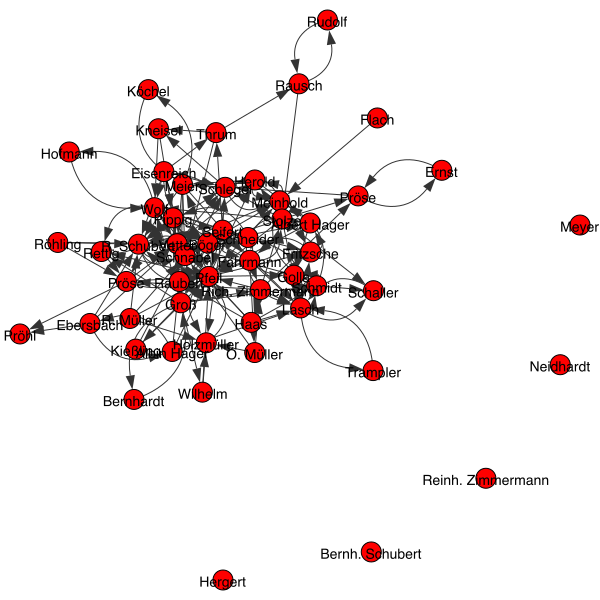

In [4]:
import cairocffi
# layout = g.layout("kk")
plot(VertexClustering(g))

### Simple Statistics with Python igraph

To demonstrate that you can use Python as a statistical engine to support your Graphi work, we now run a few simple statistics.

In [5]:
# node degree
node_degree = g.degree(mode='all')
# degree distribution
degree_distr = g.degree_distribution(mode='all')

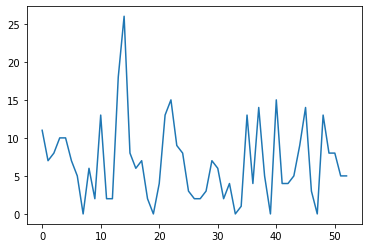

In [6]:
# ??
plt.plot(node_degree)

### Change the graph

Next we update the graph to prepare it for its Gephi visualisation. You should know already how this works.

In [7]:
plot(g, layout = layout, vertex_color='orange', edge_arrow_size=.2, edge_color='grey', edge_curved=False)

TypeError: 'module' object is not iterable

### Hubs/Authorities

Let's do one more example analysis. Network hubs are expected to contain vertices with a large number of outgoing links, while authorities would get many incoming links from hubs.

Let's plot both.

In [8]:
hs = g.hub_score()
asc = g.authority_score()

In [9]:
plot(g, layout = layout, vertex_color='orange', vertex_size=g.hub_score()*20, edge_color='grey', edge_curved=False)

TypeError: 'module' object is not iterable

In [10]:
plot(g, layout = layout, vertex_color='orange', vertex_size=g.authority_score()*20, edge_color='grey', edge_curved=False)

TypeError: 'module' object is not iterable

## Twitter Network Analysis

The Delitsch network is quite interesting, but maybe you are more excited by being able to visualise Twitter networks?

First we do our Twitter thing and set up the environment for searching Twitter from R. I have defined a token for you and use this opportunity to show you how to load it.

In [11]:
import requests
from ipynb.fs.full.keys import *
import tweepy

consumer_key = twit_key
consumer_secret = twit_secr
access_token = twit_token

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

ModuleNotFoundError: No module named 'ipynb.fs.full.keys'

Now we search Twitter for the 'truth'. Up to 100 recent Tweets.

In [43]:
import tweepy as tw
tweets = tw.Cursor(api.search, 
                           q='truth',
                           lang="en").items(100)

In [46]:
users_text = [[tweet.user.screen_name, tweet.text, tweet.user.followers_count, tweet.user.favourites_count] for tweet in tweets]
# users_text

In [47]:
tweet_df = pd.DataFrame(data=users_text, 
                    columns=['user', "text", 'followers', 'favourites_count'])
tweet_df

,user,text,followers,favourites_count
0,1OusmaneSembene,"Mina ngeke ngi celebrate umthengisi,no matter ...",8676,8367
1,pureeastside,RT @garyhgoodridge: The truth is everybody is ...,617,12915
2,Rachell02423929,RT @rosemcgowan: This man is being murdered in...,21,795
3,SimpleS18790446,RT @SteveTiger999: A seemingly inviolable law:...,1403,51745
4,rogerlwhite,RT @Iain_L: The wonderful thing is that despit...,5531,107006
...,...,...,...,...
94,Nathanael_Mammo,"""It's happening to Ethiopia today. Tomorrow it...",223,4518
95,Here4Pakistan,RT @sayedzbukhari: TRUTH ALWAYS WINS!\nUpon co...,175,47991
96,neymrqz,RT @rebellicca: I ask you to honor the day by ...,3472,30774
97,elsancl07,RT @bbyadult: just wanted to show off my shirt...,739,8239


In [18]:
# edges <- gt_edges(tweets, text, screen_name, status_id)
# #edges <- edges[!duplicated(edges),]
# nodes <- gt_nodes(edges, meta = TRUE)

Let's plot a quick histogram of followers_count to demonstrate what we could do with it.

<AxesSubplot:ylabel='Frequency'>

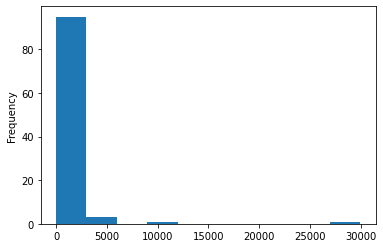

In [19]:
tweet_df['followers'].plot.hist()

In [20]:
# Collect edges and nodes with the count for the favourite
# but what are the relations? the nodes are the users but what is the edge, is it the amount of followers?
nodes = pd.DataFrame(columns=['user_name'])
# nodes['userid'] = graphdata.follower.unique()
nodes['user_name'] = tweet_df.user.unique()

relations = pd.DataFrame(columns=['followers'])
relations['followers'] = tweet_df['followers']
# relations['follower'] = graphdata['follower']



In [25]:
graph = Graph.DictList(
          vertices=nodes.to_dict('records'),
          edges=relations.to_dict('records'),
          directed=True,
          vertex_name_attr='user_name',
          edge_foreign_keys=('followers'));

ValueError: too many values to unpack (expected 2)

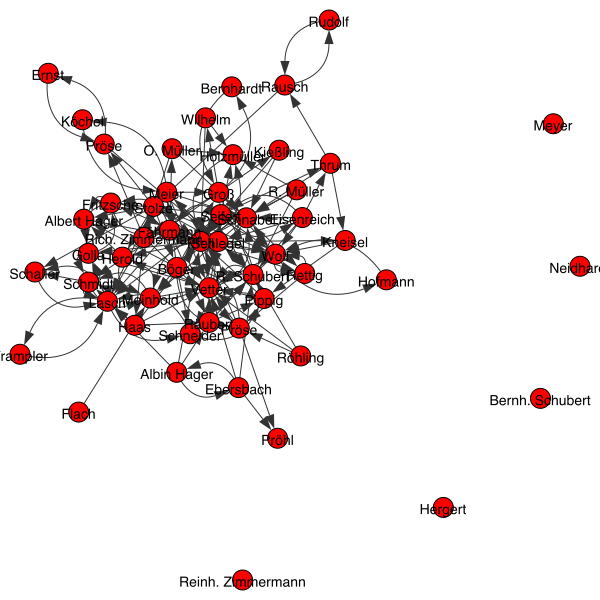